In [32]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

In [28]:
df = pd.read_csv('../../../gc-data-2020.04-100000.csv')
decks = np.array([d for d in df.values[:,1:] if 'Heal' not in d])
unique_decks = np.unique([str(sorted(d)) for d in decks])
unique_decks.shape

(15381,)

In [43]:
unique_decks_win_dict = {}
for deck in tqdm(unique_decks[:1000]):
    url = 'https://royaleapi.com/decks/stats/{}'.format(','.join(eval(deck)))
    req = requests.get(url, headers)
    soup = BeautifulSoup(req.content, 'html.parser')
    win_rate_row = soup.find("table", {"class":"ui very basic compact stats unstackable table"}).find_all('td')[3]
    win_rate = eval(win_rate_row.text[:-1])
    unique_decks_win_dict[deck] = win_rate
    time.sleep(.1)


  7%|█████▎                                                                          | 67/1000 [02:04<28:27,  1.83s/it]


 14%|██████████▋                                                                    | 135/1000 [04:37<38:39,  2.68s/it]


 20%|████████████████                                                               | 203/1000 [06:51<25:50,  1.95s/it]


 27%|█████████████████████▍                                                         | 271/1000 [09:01<23:50,  1.96s/it]


 34%|██████████████████████████▊                                                    | 339/1000 [11:17<23:16,  2.11s/it]


 41%|████████████████████████████████▏                                              | 407/1000 [13:34<19:50,  2.01s/it]


 48%|█████████████████████████████████████▌                                         | 475/1000 [15:46<17:17,  1.98s/it]


 51%|████████████████████████████████████████▏                                      | 509/1000 [16:45<12:33,  1.53s/it]

KeyboardInterrupt: 

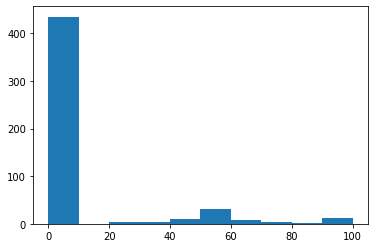

In [44]:
plt.hist(unique_decks_win_dict.values())
plt.show();

In [47]:
from collections import Counter
Counter(list(unique_decks_win_dict.values())).most_common()

[(0.0, 435),
 (100.0, 12),
 (50.0, 10),
 (57.1, 4),
 (60.0, 2),
 (80.0, 1),
 (49.6, 1),
 (66.7, 1),
 (54.8, 1),
 (54.5, 1),
 (48.4, 1),
 (53.7, 1),
 (48.8, 1),
 (56.6, 1),
 (43.8, 1),
 (58.5, 1),
 (92.9, 1),
 (61.3, 1),
 (53.8, 1),
 (62.6, 1),
 (51.7, 1),
 (86.1, 1),
 (57.9, 1),
 (54.2, 1),
 (68.1, 1),
 (77.3, 1),
 (58.6, 1),
 (71.2, 1),
 (36.4, 1),
 (61.5, 1),
 (53.6, 1),
 (37.5, 1),
 (56.7, 1),
 (78.6, 1),
 (49.9, 1),
 (47.8, 1),
 (39.3, 1),
 (25.9, 1),
 (56.2, 1),
 (40.0, 1),
 (48.1, 1),
 (52.4, 1),
 (57.3, 1),
 (51.4, 1),
 (20.0, 1),
 (46.3, 1),
 (59.7, 1),
 (56.1, 1),
 (28.6, 1),
 (40.5, 1),
 (44.4, 1)]